In [2]:
# Import libraries
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%pip install missingno
import missingno as msno
%pip install fancyimpute
from fancyimpute import IterativeImputer, KNN



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.8 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: 

In [5]:
# Load the dataset
wetter_daten = pd.read_csv("../bakery_sales_data/wetter.csv")

wetter_daten.head()  

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


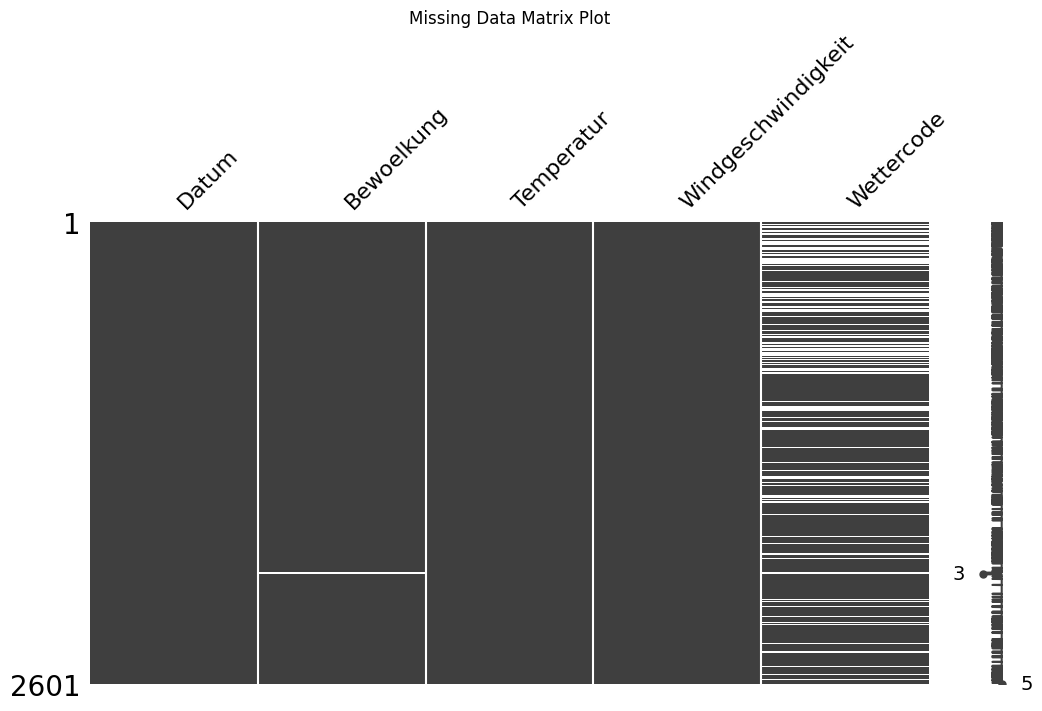

In [6]:
# Matrix plot of missing data
msno.matrix(wetter_daten, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

C:\Users\alice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


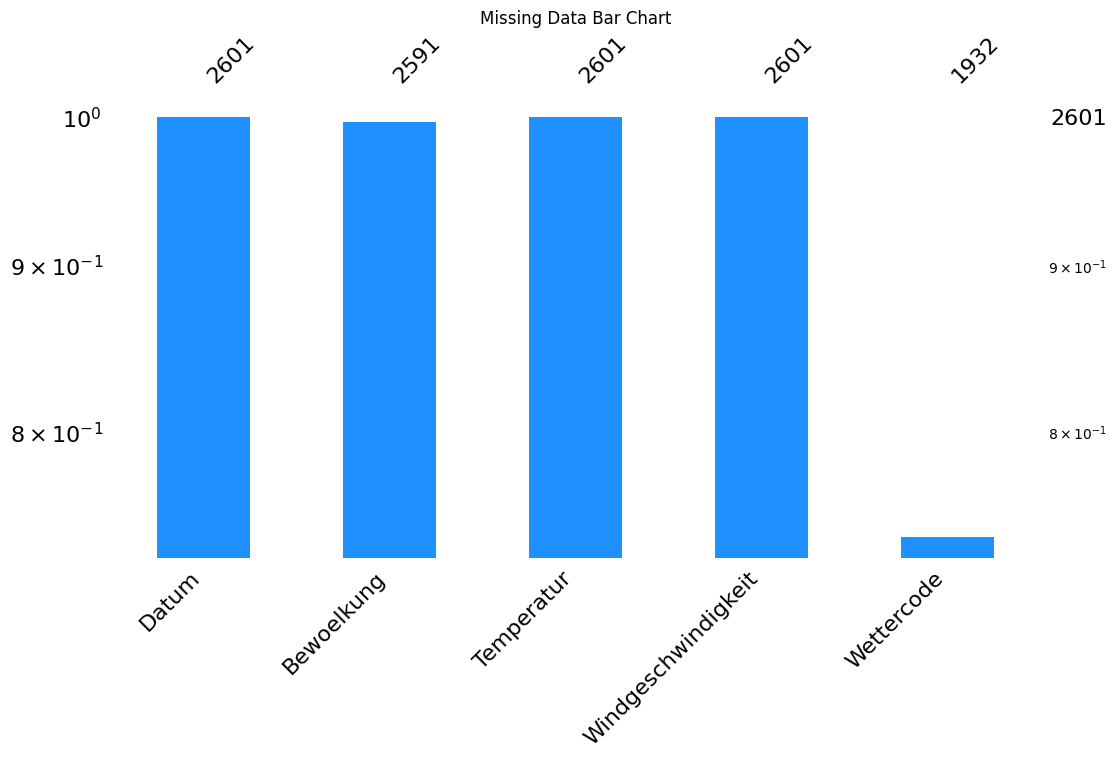

In [7]:
# Bar plot of missing data
msno.bar(wetter_daten, color="dodgerblue", log=True, figsize=(12, 6))
plt.title('Missing Data Bar Chart')
plt.show()

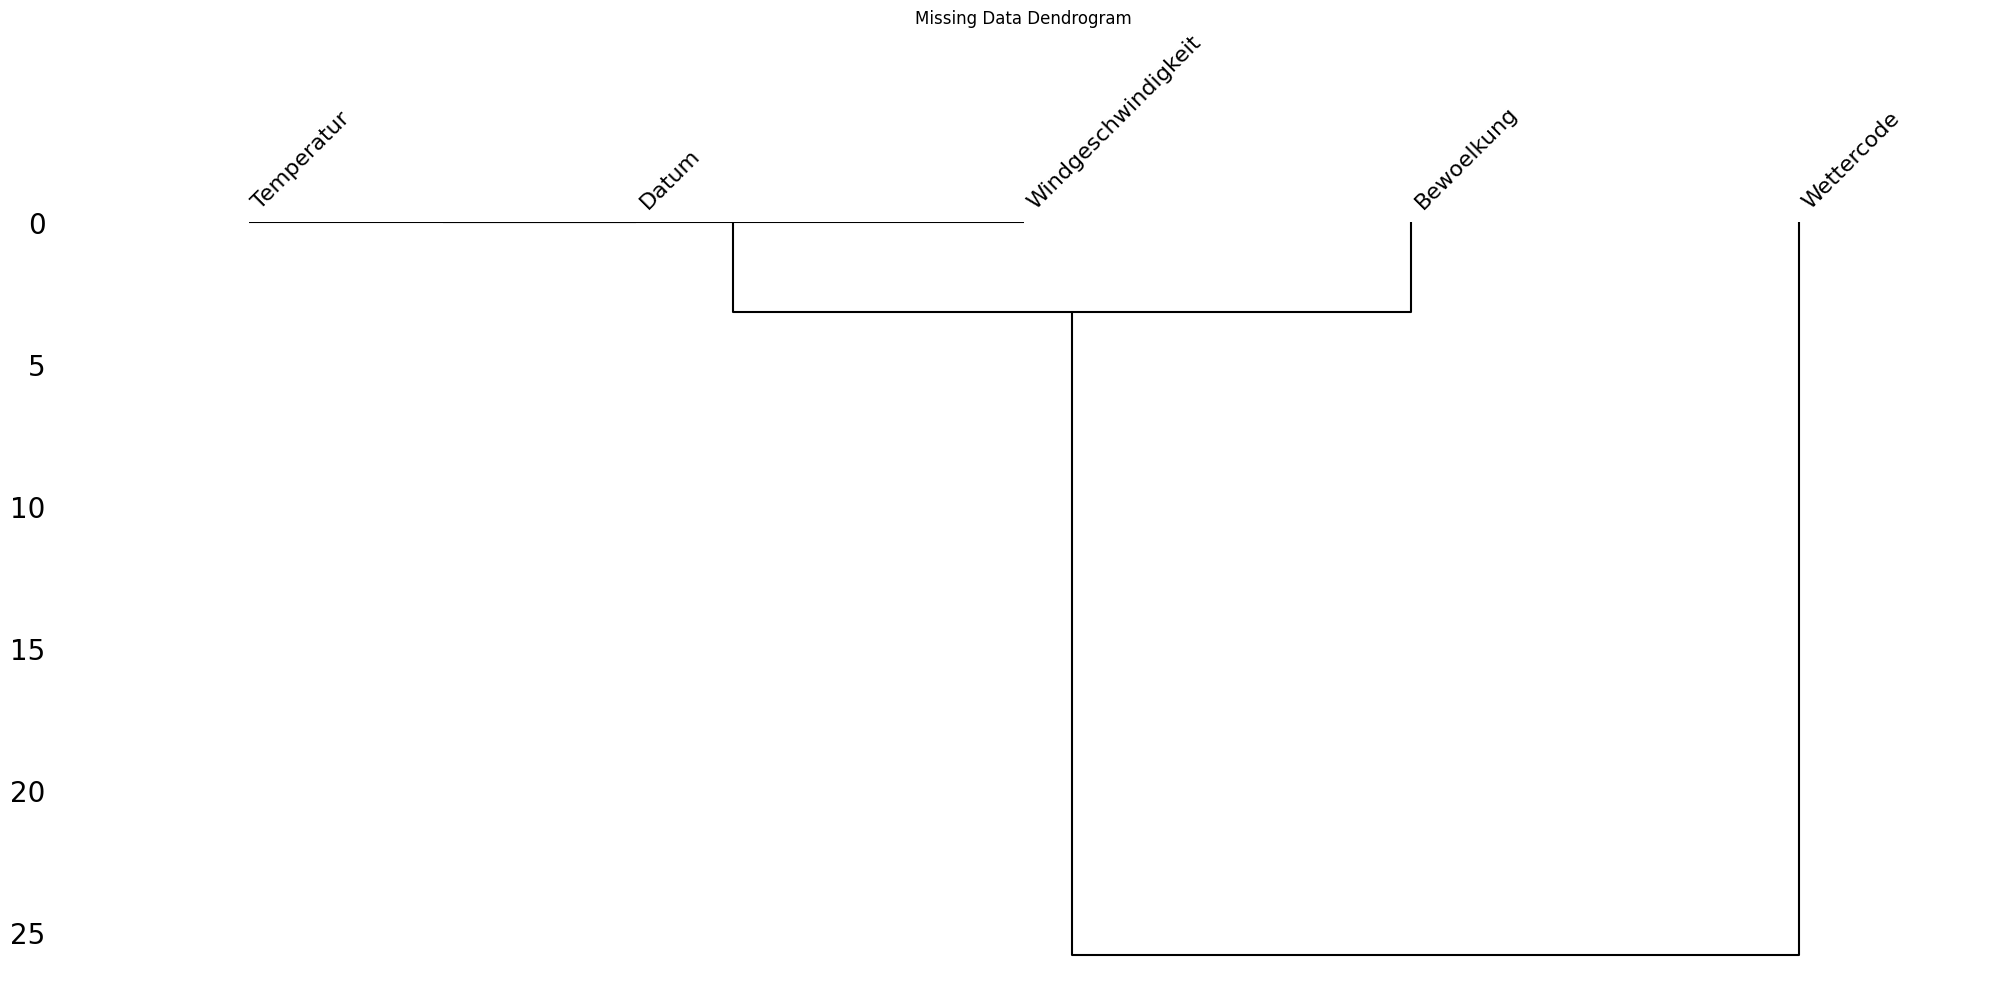

In [8]:
# Dendrogram to visualize the correlation of missingness between variables
# erstmal nicht so wichtig.
msno.dendrogram(wetter_daten)
plt.title('Missing Data Dendrogram')
plt.show()

In [9]:
# Create a mask for the imputed values
mask = wetter_daten['Wettercode'].isna()  # mask for missing values in 'Ozone'

In [12]:
# Step 1: Separate numeric and non-numeric columns
numeric_cols = wetter_daten.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = wetter_daten.select_dtypes(exclude=['float64', 'int64']).columns

# Step 2: Apply KNN imputer only to numeric columns

numeric_data = wetter_daten[numeric_cols]
# KNN imputation
imputer_knn = KNN()
wetter_daten_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(numeric_data), columns=numeric_cols)

# Check the imputed DataFrame
print(wetter_daten_knn_imputed.head())

Imputing row 1/2601 with 0 missing, elapsed time: 0.792
Imputing row 101/2601 with 0 missing, elapsed time: 0.795
Imputing row 201/2601 with 0 missing, elapsed time: 0.796
Imputing row 301/2601 with 0 missing, elapsed time: 0.797
Imputing row 401/2601 with 1 missing, elapsed time: 0.798
Imputing row 501/2601 with 0 missing, elapsed time: 0.799
Imputing row 601/2601 with 0 missing, elapsed time: 0.800
Imputing row 701/2601 with 1 missing, elapsed time: 0.800
Imputing row 801/2601 with 0 missing, elapsed time: 0.803
Imputing row 901/2601 with 0 missing, elapsed time: 0.804
Imputing row 1001/2601 with 0 missing, elapsed time: 0.804
Imputing row 1101/2601 with 1 missing, elapsed time: 0.805
Imputing row 1201/2601 with 0 missing, elapsed time: 0.806
Imputing row 1301/2601 with 0 missing, elapsed time: 0.807
Imputing row 1401/2601 with 1 missing, elapsed time: 0.807
Imputing row 1501/2601 with 0 missing, elapsed time: 0.808
Imputing row 1601/2601 with 0 missing, elapsed time: 0.809
Imputing 

In [16]:
# Step 1: Separate numeric and non-numeric columns
numeric_cols = wetter_daten.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = wetter_daten.select_dtypes(exclude=['float64', 'int64']).columns

# Step 2: Apply IRMI only to numeric columns

numeric_data = wetter_daten[numeric_cols]


# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
wetter_daten_irmi = pd.DataFrame(imputer_irmi.fit_transform(numeric_data), columns=numeric_cols)

print(wetter_daten_irmi.head())

   Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0         8.0      9.8250                 14.0   58.000000
1         7.0      7.4375                 12.0   47.499641
2         8.0      5.5375                 18.0   63.000000
3         4.0      5.6875                 19.0   80.000000
4         6.0      5.3000                 23.0   80.000000


In [18]:
# Define a function for scatter plots that highlights imputed values
def plot_scatter_with_imputation(wetter_daten_knn_imputed, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    # Plot non-imputed points
    sns.scatterplot(x=wetter_daten_knn_imputed.loc[~mask, x], y=wetter_daten_knn_imputed.loc[~mask, y], color='blue', label='Original')
    # Plot imputed points
    sns.scatterplot(x=wetter_daten_knn_imputed.loc[mask, x], y=wetter_daten_knn_imputed.loc[mask, y], color='red', label='Imputed')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

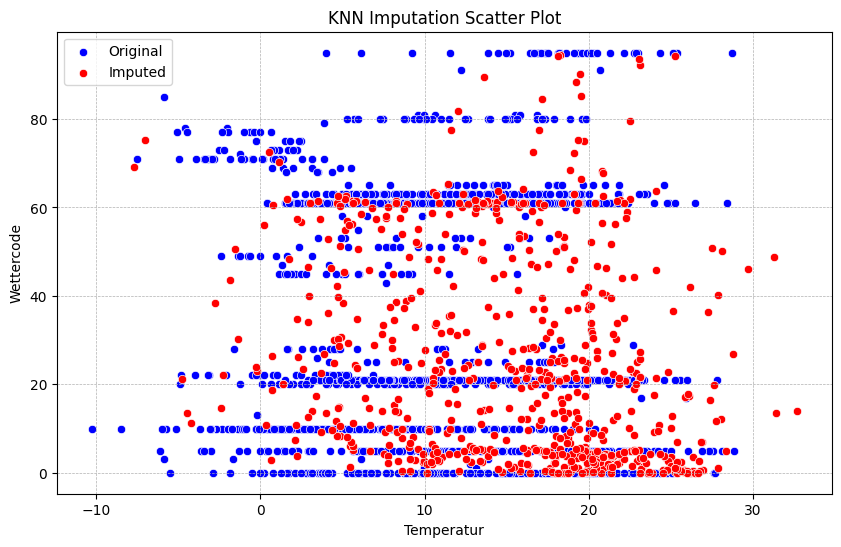

In [19]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(wetter_daten_knn_imputed, 'Temperatur', 'Wettercode', mask, 'KNN Imputation Scatter Plot', 'Temperatur', 'Wettercode')

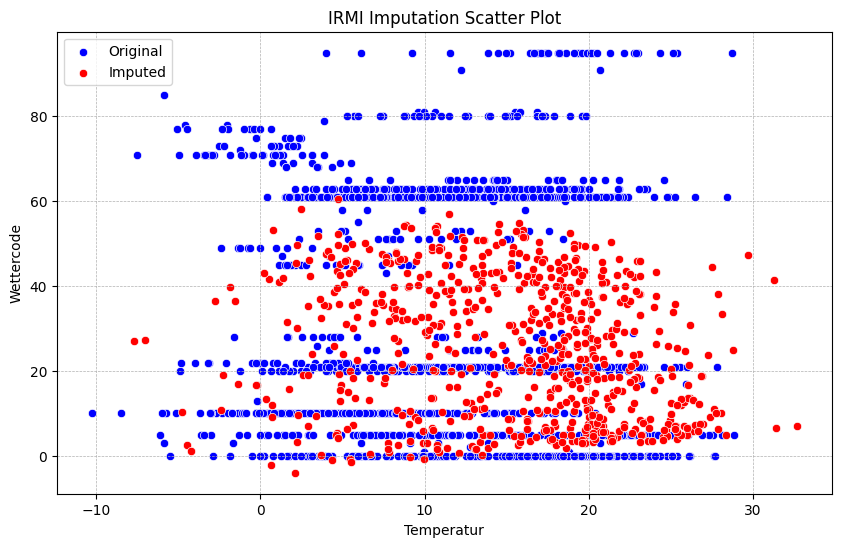

In [20]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(wetter_daten_irmi, 'Temperatur', 'Wettercode', mask, 'IRMI Imputation Scatter Plot', 'Temperatur', 'Wettercode')

In [22]:
print("Correlation in original data:", wetter_daten['Temperatur'].corr(wetter_daten['Wettercode'], method='pearson'))
print("Correlation after KNN imputation:", wetter_daten_knn_imputed['Temperatur'].corr(wetter_daten_knn_imputed['Wettercode']))
print("Correlation after IRMI:", wetter_daten_irmi['Temperatur'].corr(wetter_daten_irmi['Wettercode']))

Correlation in original data: -0.07470051512789756
Correlation after KNN imputation: -0.15985040196243103
Correlation after IRMI: -0.14501833918488133
